Smapling,Resampling 
Arithmatic operation 
logical operation 






# 1. Apply sub-sampling :

In [70]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import NoNorm

gray_img = cv2.imread("Clena.tiff",0)

def generate_matrix(sampling_resolution):
    return np.random.randint(low=0, high=1, size=(sampling_resolution, sampling_resolution))

def sub_sampling(original_resolution, sampling_resolution):
    
    random_matrix = generate_matrix(sampling_resolution)
    
    for a,i in enumerate(range(0,original_resolution, original_resolution//sampling_resolution)):
        for b,j in enumerate(range(0,original_resolution, original_resolution//sampling_resolution)):
            random_matrix[a][b] = gray_img[i][j]
    
    return random_matrix


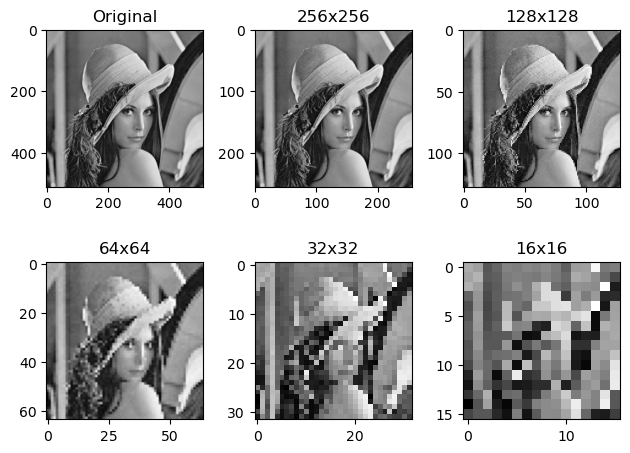

In [71]:
sampled_matrix1 = sub_sampling(512, 256)

sampled_matrix2 = sub_sampling(512, 128)

sampled_matrix3 = sub_sampling(512, 64)

sampled_matrix4 = sub_sampling(512, 32)

sampled_matrix5 = sub_sampling(512, 16)

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(gray_img, cmap = "gray")

plt.subplot(2,3,2)
plt.title('256x256')
plt.imshow(sampled_matrix1, cmap = "gray")

plt.subplot(2,3,3)
plt.title('128x128')
plt.imshow(sampled_matrix2, cmap = "gray")

plt.subplot(2,3,4)
plt.title('64x64')
plt.imshow(sampled_matrix3, cmap = "gray")

plt.subplot(2,3,5)
plt.title('32x32')
plt.imshow(sampled_matrix4, cmap = "gray")

plt.subplot(2,3,6)
plt.title('16x16')
plt.imshow(sampled_matrix5, cmap = "gray")

plt.tight_layout()

# 2. Apply re-sampling :

sampled_image =  [[162 162 162 ... 168 171 155]
 [162 162 162 ... 168 171 155]
 [162 162 162 ... 168 171 155]
 ...
 [ 48  57  54 ...  75  97  88]
 [ 46  50  52 ...  89 100  98]
 [ 44  55  54 ...  97 100 105]]
resampled_image =  [[162 162 162 ... 162 162 162]
 [162 162 162 ... 162 162 162]
 [162 162 162 ... 162 162 162]
 ...
 [ 46  46  46 ...  46  46  46]
 [ 44  44  44 ...  44  44  44]
 [ 44  44  44 ...  44  44  44]]


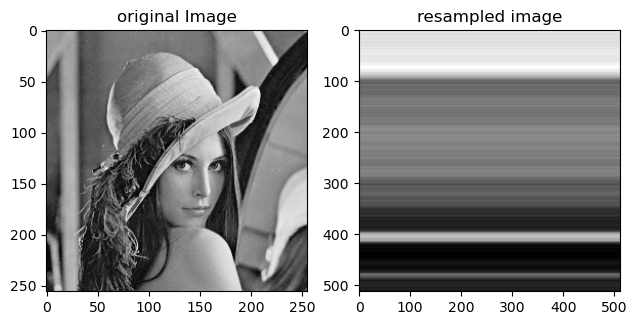

In [91]:
print("sampled_image = ", sampled_matrix1)

new_img = np.random.randint(low = 0, high = 1, size = (512,512))

original_resolution = 256

resampling_resolution = 512

repeat = resampling_resolution//original_resolution

for i in range(0,256):
    for j in range(0,256):
        new_img[i*repeat:i*repeat+repeat][j*repeat:j*repeat+repeat] = sampled_matrix1[i][j]

print("resampled_image = ",new_img)

plt.subplot(1,2,1)
plt.title("original Image")
plt.imshow(sampled_matrix1, cmap="gray")

plt.subplot(1,2,2)
plt.title("resampled image")
plt.imshow(new_img,cmap = "gray")
plt.tight_layout()

# 3. Apply basic arithematic operations on two images :

## 1. Addition :

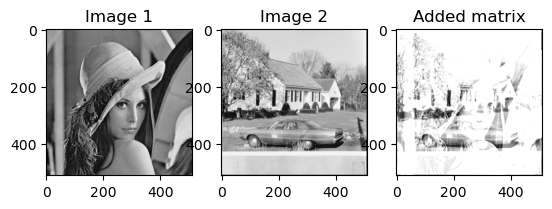

In [73]:
image1 = cv2.imread("//home//kylo_ren//imageProcessing//Clena.tiff",0)

image2 = cv2.imread("//home//kylo_ren//imageProcessing//Chouse1.tiff",0)

added_matrix = cv2.add(image1, image2)

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(image1, cmap = "gray")

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(image2, cmap = "gray")

plt.subplot(1,3,3)
plt.title("Added matrix")
plt.imshow(added_matrix, cmap = "gray")

## 2. Subtraction :

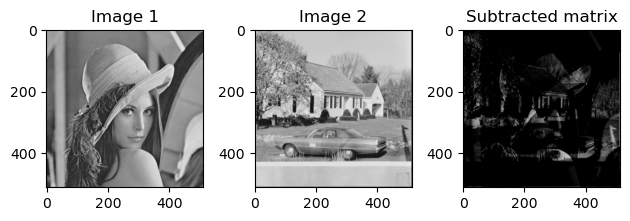

In [74]:
image1 = cv2.imread("Clena.tiff",0)

image2 = cv2.imread("Chouse1.tiff",0)

subtracted_matrix = cv2.subtract(image1, image2)

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(image1, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(image2, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,3)
plt.title("Subtracted matrix")
plt.imshow(subtracted_matrix, cmap = "gray", norm = NoNorm())

plt.tight_layout()

## 3. Multiplication :

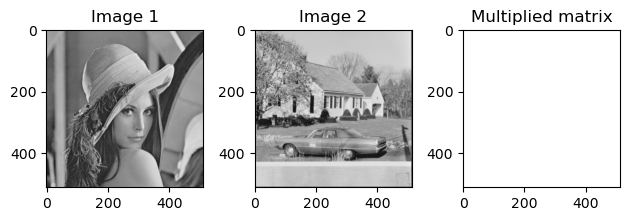

In [75]:
image1 = cv2.imread("Clena.tiff",0)

image2 = cv2.imread("Chouse1.tiff",0)

multiplied_matrix = cv2.multiply(image1, image2)

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(image1, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(image2, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,3)
plt.title("Multiplied matrix")
plt.imshow(multiplied_matrix, cmap = "gray", norm = NoNorm())

plt.tight_layout()

## 4. Averaging :

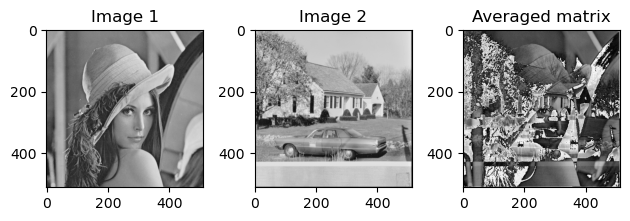

In [76]:
image1 = cv2.imread("Clena.tiff",0)

image2 = cv2.imread("Chouse1.tiff",0)

averaged_matrix = np.ceil((image1 + image2)/2)

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(image1, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(image2, cmap = "gray", norm = NoNorm())

plt.subplot(1,3,3)
plt.title("Averaged matrix")
plt.imshow(averaged_matrix, cmap = "gray")

plt.tight_layout()

# 4. Apply basic logic operations on two images :

In [77]:
image1 = cv2.imread("Clena.tiff",0)

image2 = cv2.imread("Chouse1.tiff",0)


def generate_matrix(sample_image): # function returning matrix of same size as the image matrix
    return np.zeros(sample_image.shape, 'uint8')


def thresholding(image): # function returning the binary image of a grayscale image having multi-pixel values
    for i in range(0,512):
        for j in range(0,512):
            if image[i][j] <= 127:
                image[i][j] = 0
            else:
                image[i][j] = 1
    return image


def operation_AND(image1, image2, and_matrix): # function to take AND of two binary images
    for i in range(0,512):
        for j in range(0,512):
            and_matrix[i][j] = image1[i][j] & image2[i][j]
    return and_matrix

def operation_OR(image1, image2, or_matrix): # function to take OR of two binary images
    for i in range(0,512):
        for j in range(0,512):
            or_matrix[i][j] = image1[i][j] | image2[i][j]
    return or_matrix

def operation_NOT(image, not_matrix): # function to take NOT of a binary image
    for i in range(0,512):
        for j in range(0,512):
            not_matrix[i][j] = not image[i][j]  
    return not_matrix

image1 = thresholding(image1)

image2 = thresholding(image2)

## 1. AND : 

In [78]:
and_matrix = generate_matrix(image1)
and_matrix = operation_AND(image1 , image2, and_matrix)

## 2. OR :

In [79]:
or_matrix = generate_matrix(image1)
or_matrix = operation_OR(image1 , image2, or_matrix)

## 3. NOT :

In [80]:
not_matrix1 = generate_matrix(image1)
not_matrix1 = operation_NOT(image1, not_matrix1)

not_matrix2 = generate_matrix(image2)
not_matrix2 = operation_NOT(image2, not_matrix2)

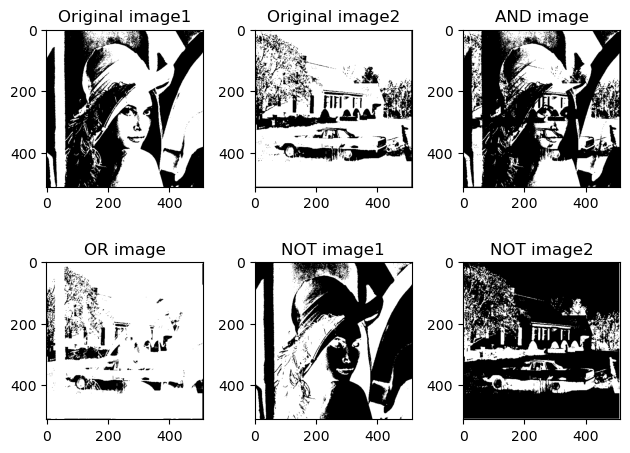

In [81]:
# Displaying AND, OR, NOT images: 

plt.subplot(2,3,1)
plt.title("Original image1")
plt.imshow(image1, cmap = "gray")

plt.subplot(2,3,2)
plt.title("Original image2")
plt.imshow(image2, cmap = "gray")

plt.subplot(2,3,3)
plt.title("AND image")
plt.imshow(and_matrix, cmap = "gray")

plt.subplot(2,3,4)
plt.title("OR image")
plt.imshow(or_matrix, cmap = "gray")

plt.subplot(2,3,5)
plt.title("NOT image1")
plt.imshow(not_matrix1, cmap = "gray")

plt.subplot(2,3,6)
plt.title("NOT image2")
plt.imshow(not_matrix2, cmap = "gray")

plt.tight_layout()